In [8]:
import random
import os
import glob
import math
os.chdir('Prim')

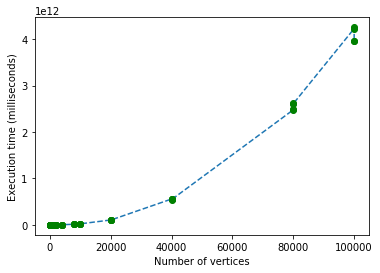

In [59]:
# Naive_Kruskal's algorithm

list_mst_kn = [(10, 24000), (10, 33500), (10, 29400), (10, 27900), (20, 91200), (20, 5147100), (20, 152800), (20, 92200), (40, 571900), (40, 346500), (40, 346400), (40, 550600), (80, 1239300), (80, 1487600), (80, 1385500), (80, 1315100), (100, 2483500), (100, 1952000), (100, 1990500), (100, 1939200), (200, 8082000), (200, 7891200), (200, 7603400), (200, 7953400), (400, 34503800), (400, 33490400), (400, 32684800), (400, 34072400), (800, 136868000), (800, 135395600), (800, 130161100), (800, 133434400), (1000, 209607900), (1000, 213754400), (1000, 204260800), (1000, 218018100), (2000, 891738600), (2000, 898465300), (2000, 889159400), (2000, 910125800), (4000, 3527424100), (4000, 3595979500), (4000, 3625231700), (4000, 3661937500), (8000, 14946859200), (8000, 14723164800), (8000, 14599143700), (8000, 15127928900), (10000, 23383172800), (10000, 22737335600), (10000, 22808731300), (10000, 23072231600), (20000, 106005614600), (20000, 105631635500), (20000, 101904117700), (20000, 103504139900), (40000, 557280065300), (40000, 551891321500), (40000, 551483565100), (40000, 544082208200), (80000, 2478429175000), (80000, 2492984700900), (80000, 2620204579200), (80000, 2610450370400), (100000, 4227941673900), (100000, 4257019386700), (100000, 3967225259000), (100000, 3960368585300)]

x_val = []
y_val = []

for (x,y) in list_mst_kn:
    x_val.append(x)
    y_val.append(y)


import matplotlib.pyplot as plt
plt.plot(x_val,y_val,'--')
plt.plot(x_val,y_val,'og')
plt.ylabel("Execution time (milliseconds)")
plt.xlabel("Number of vertices")
plt.show()

In [66]:
def initialize(fileaddress):
    vertices = set()
    edges = [] 
    with open(glob.glob(fileaddress)[0]) as f:
        lines = f.readlines()
    Number_Of_V_E = lines[0].split()
    return Number_Of_V_E

V_E_C = []
for i in os.listdir():
    Number_Of_V_E = initialize(i)
    V_E_C.append((int(Number_Of_V_E[0]),int(Number_Of_V_E[1])))
list_sizes = [item[0] for item in list_mst_kn]
run_times = [item[1] for item in list_mst_kn]

ratios = [None]
for i in range(len(run_times)-1):
    ratios.append(run_times[i+1]/run_times[i])

c_estimates = []
for i in range(len(run_times)):
    V = V_E_C[i][0]
    E = V_E_C[i][1]
    c_estimates.append(run_times[i]/(E * V))

print("Size\t\tTime(ns)\t\t\tCostant\t\t\t\tRatio")
print(100*"-")
for i in range(len(list_sizes)):
    print(list_sizes[i], run_times[i], '', c_estimates[i], '', ratios[i], sep="\t\t")
print(100*"-")

c = sum(c_estimates)/len(c_estimates)

Size		Time(ns)			Costant				Ratio
----------------------------------------------------------------------------------------------------
10		24000				11.538461538461538				None
10		33500				16.42156862745098				1.3958333333333333
10		29400				13.363636363636363				0.8776119402985074
10		27900				3.3859223300970873				0.9489795918367347
20		91200				10.363636363636363				3.2688172043010755
20		5147100				601.2967289719626				56.4375
20		152800				17.522935779816514				0.029686619649899944
20		92200				6.880597014925373				0.6034031413612565
40		571900				44.333333333333336				6.202819956616052
40		346500				26.450381679389313				0.605875152998776
40		346400				3464.0				0.9997113997113997
40		550600				44.048				1.5894919168591224
80		1239300				23.83269230769231				2.2508172902288415
80		1487600				27.44649446494465				1.2003550391349955
80		1385500				26.955252918287936				0.9313659585910191
80		1315100				25.09732824427481				0.9491880187657885
100		2483500				11.371336996336996				1.8

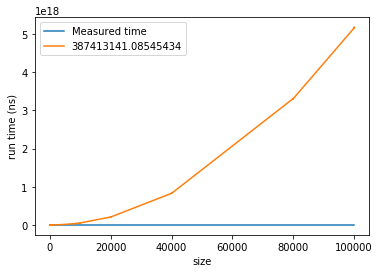

In [68]:
import matplotlib.pyplot as plt

x = []
for i in range(len(V_E_C)):
    V = V_E_C[i][0]
    E = V_E_C[i][1]
    x.append((V,c * E * V))

import matplotlib.pyplot as plt
results = sorted(x,key=lambda x: x[0])
x_val = [x[0] for x in results]
y_val = [x[1] for x in results]
plt.plot(list_sizes, run_times)
plt.plot(x_val, y_val)
plt.legend(["Measured time", c," * N"])
plt.ylabel('run time (ns)')
plt.xlabel('size')
plt.show()

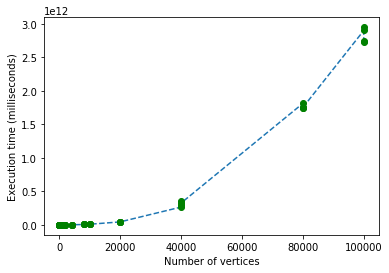

In [62]:
# Efficient_Kruskal's algorithm

list_mst_ke = [(10, 30100), (10, 37800), (10, 38200), (10, 77200), (20, 86600), (20, 115900), (20, 92600), (20, 94000), (40, 314300), (40, 307300), (40, 242900), (40, 352300), (80, 795000), (80, 828000), (80, 1121600), (80, 783600), (100, 1367100), (100, 1389600), (100, 1160900), (100, 1073700), (200, 4117500), (200, 4033000), (200, 4155600), (200, 4197900), (400, 16837600), (400, 16215100), (400, 15222400), (400, 15251300), (800, 62482600), (800, 64100100), (800, 61568300), (800, 63601000), (1000, 95166600), (1000, 97393600), (1000, 98970100), (1000, 96134100), (2000, 405935200), (2000, 406663000), (2000, 406176000), (2000, 418425400), (4000, 1644818700), (4000, 1645803200), (4000, 1651764700), (4000, 1663303200), (8000, 6653808500), (8000, 6638481500), (8000, 6804117300), (8000, 6644977200), (10000, 10374184800), (10000, 10260758700), (10000, 10362527700), (10000, 10361383400), (20000, 44795341600), (20000, 45190369400), (20000, 45116802000), (20000, 45606853700), (40000, 266453271100), (40000, 292673057200), (40000, 357639664900), (40000, 326709056300), (80000, 1811962037900), (80000, 1745814066400), (80000, 1745204057500), (80000, 1751260676000), (100000, 2898594067500), (100000, 2946948211400), (100000, 2732021579800), (100000, 2738280031800)]

x_val = []
y_val = []

for (x,y) in list_mst_ke:
    x_val.append(x)
    y_val.append(y)


import matplotlib.pyplot as plt
plt.plot(x_val,y_val,'--')
plt.plot(x_val,y_val,'og')
plt.ylabel("Execution time (milliseconds)")
plt.xlabel("Number of vertices")
plt.show()

In [63]:
def initialize(fileaddress):
    vertices = set()
    edges = [] 
    with open(glob.glob(fileaddress)[0]) as f:
        lines = f.readlines()
    Number_Of_V_E = lines[0].split()
    return Number_Of_V_E

V_E_C = []
for i in os.listdir():
    Number_Of_V_E = initialize(i)
    V_E_C.append((int(Number_Of_V_E[0]),int(Number_Of_V_E[1])))
list_sizes = [item[0] for item in list_mst_kn]
run_times = [item[1] for item in list_mst_kn]

ratios = [None]
for i in range(len(run_times)-1):
    ratios.append(run_times[i+1]/run_times[i])

c_estimates = []
for i in range(len(run_times)):
    V = V_E_C[i][0]
    E = V_E_C[i][1]
    c_estimates.append(run_times[i]/(E * V))

print("Size\t\tTime(ns)\t\t\tCostant\t\t\t\tRatio")
print(100*"-")
for i in range(len(list_sizes)):
    print(list_sizes[i], run_times[i], '', c_estimates[i], '', ratios[i], sep="\t\t")
print(100*"-")

c = sum(c_estimates)/len(c_estimates)

Size		Time(ns)			Costant				Ratio
----------------------------------------------------------------------------------------------------
10		24000				125.11616800699235				None
10		33500				178.06565740864437				1.3958333333333333
10		29400				144.90727094628025				0.8776119402985074
10		27900				61.814728432823856				0.9489795918367347
20		91200				189.2026174671144				3.2688172043010755
20		5147100				10977.509341710558				56.4375
20		152800				319.9056005942438				0.029686619649899944
20		92200				149.4102657891038				0.6034031413612565
40		571900				962.6861015522081				6.202819956616052
40		346500				574.3627403796821				0.605875152998776
40		346400				15043.960853128641				0.9997113997113997
40		550600				956.4901669437219				1.5894919168591224
80		1239300				899.6324930690138				2.2508172902288415
80		1487600				1036.0456939870558				1.2003550391349955
80		1385500				1017.5023900408535				0.9313659585910191
80		1315100				947.369759415761				0.9491880187657885
100		2483500				759.

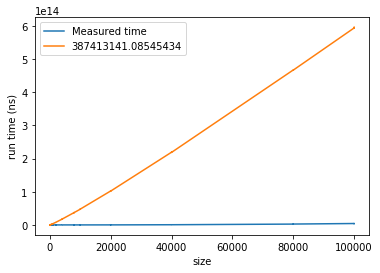

In [69]:
import matplotlib.pyplot as plt

x = []
for i in range(len(V_E_C)):
    V = V_E_C[i][0]
    E = V_E_C[i][1]
    x.append((V,c * E * math.log(V)))

import matplotlib.pyplot as plt
results = sorted(x,key=lambda x: x[0])
x_val = [x[0] for x in results]
y_val = [x[1] for x in results]
plt.plot(list_sizes, run_times)
plt.plot(x_val, y_val)
plt.legend(["Measured time", c," * N"])
plt.ylabel('run time (ns)')
plt.xlabel('size')
plt.show()

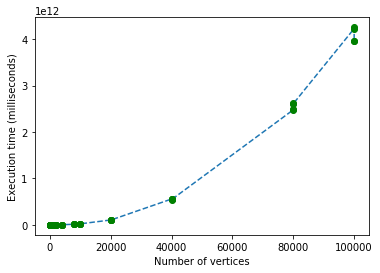

In [56]:
# Prim's algorithm

list_mst_prim = [(10, 24000), (10, 33500), (10, 29400), (10, 27900), (20, 91200), (20, 5147100), (20, 152800), (20, 92200), (40, 571900), (40, 346500), (40, 346400), (40, 550600), (80, 1239300), (80, 1487600), (80, 1385500), (80, 1315100), (100, 2483500), (100, 1952000), (100, 1990500), (100, 1939200), (200, 8082000), (200, 7891200), (200, 7603400), (200, 7953400), (400, 34503800), (400, 33490400), (400, 32684800), (400, 34072400), (800, 136868000), (800, 135395600), (800, 130161100), (800, 133434400), (1000, 209607900), (1000, 213754400), (1000, 204260800), (1000, 218018100), (2000, 891738600), (2000, 898465300), (2000, 889159400), (2000, 910125800), (4000, 3527424100), (4000, 3595979500), (4000, 3625231700), (4000, 3661937500), (8000, 14946859200), (8000, 14723164800), (8000, 14599143700), (8000, 15127928900), (10000, 23383172800), (10000, 22737335600), (10000, 22808731300), (10000, 23072231600), (20000, 106005614600), (20000, 105631635500), (20000, 101904117700), (20000, 103504139900), (40000, 557280065300), (40000, 551891321500), (40000, 551483565100), (40000, 544082208200), (80000, 2478429175000), (80000, 2492984700900), (80000, 2620204579200), (80000, 2610450370400), (100000, 4227941673900), (100000, 4257019386700), (100000, 3967225259000), (100000, 3960368585300)]

x_val = []
y_val = []

for (x,y) in list_mst_prim:
    x_val.append(x)
    y_val.append(y)


import matplotlib.pyplot as plt
plt.plot(x_val,y_val,'--')
plt.plot(x_val,y_val,'og')
plt.ylabel("Execution time (milliseconds)")
plt.xlabel("Number of vertices")
plt.show()

In [57]:
def initialize(fileaddress):
    vertices = set()
    edges = [] 
    with open(glob.glob(fileaddress)[0]) as f:
        lines = f.readlines()
    Number_Of_V_E = lines[0].split()
    return Number_Of_V_E

V_E_C = []
for i in os.listdir():
    Number_Of_V_E = initialize(i)
    V_E_C.append((int(Number_Of_V_E[0]),int(Number_Of_V_E[1])))
list_sizes = [item[0] for item in list_mst_kn]
run_times = [item[1] for item in list_mst_kn]

ratios = [None]
for i in range(len(run_times)-1):
    ratios.append(run_times[i+1]/run_times[i])

c_estimates = []
for i in range(len(run_times)):
    V = V_E_C[i][0]
    E = V_E_C[i][1]
    c_estimates.append(run_times[i]/(E * V))

print("Size\t\tTime(ns)\t\t\tCostant\t\t\t\tRatio")
print(100*"-")
for i in range(len(list_sizes)):
    print(list_sizes[i], run_times[i], '', c_estimates[i], '', ratios[i], sep="\t\t")
print(100*"-")

c = sum(c_estimates)/len(c_estimates)

Size		Time(ns)			Costant				Ratio
----------------------------------------------------------------------------------------------------
10		24000				125.11616800699235				None
10		33500				178.06565740864437				1.3958333333333333
10		29400				144.90727094628025				0.8776119402985074
10		27900				61.814728432823856				0.9489795918367347
20		91200				189.2026174671144				3.2688172043010755
20		5147100				10977.509341710558				56.4375
20		152800				319.9056005942438				0.029686619649899944
20		92200				149.4102657891038				0.6034031413612565
40		571900				962.6861015522081				6.202819956616052
40		346500				574.3627403796821				0.605875152998776
40		346400				15043.960853128641				0.9997113997113997
40		550600				956.4901669437219				1.5894919168591224
80		1239300				899.6324930690138				2.2508172902288415
80		1487600				1036.0456939870558				1.2003550391349955
80		1385500				1017.5023900408535				0.9313659585910191
80		1315100				947.369759415761				0.9491880187657885
100		2483500				759.

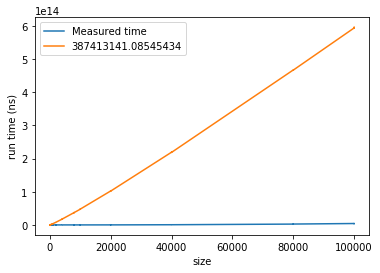

In [70]:
import matplotlib.pyplot as plt

x = []
for i in range(len(V_E_C)):
    V = V_E_C[i][0]
    E = V_E_C[i][1]
    x.append((V,c * E * math.log(V)))

import matplotlib.pyplot as plt
results = sorted(x,key=lambda x: x[0])
x_val = [x[0] for x in results]
y_val = [x[1] for x in results]
plt.plot(list_sizes, run_times)
plt.plot(x_val, y_val)
plt.legend(["Measured time", c," * N"])
plt.ylabel('run time (ns)')
plt.xlabel('size')
plt.show()